# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [107]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [108]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [109]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [110]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082
2022-03-22,0.604471,0.920926,0.975100,-0.398424
2022-03-23,1.475891,0.314021,-0.731804,-0.738141
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [111]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [112]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [113]:
df.head()

,A,B,C,D
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082
2022-03-22,0.604471,0.920926,0.975100,-0.398424
2022-03-23,1.475891,0.314021,-0.731804,-0.738141


In [114]:
df.tail()

,A,B,C,D
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082
2022-03-22,0.604471,0.920926,0.975100,-0.398424
2022-03-23,1.475891,0.314021,-0.731804,-0.738141
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [115]:
df.head(2)

,A,B,C,D
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-20,-0.157914,-1.135307,0.013720,0.355476


Display the index, columns.

In [116]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [117]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [118]:
df.to_numpy()

array([[-0.51532324, -0.11762457,  0.25584928, -0.01378376],
       [-0.15791377, -1.13530685,  0.01372006,  0.35547585],
       [-0.07038159, -1.60699854, -1.13194806,  0.7630816 ],
       [ 0.60447144,  0.92092564,  0.97509996, -0.39842433],
       [ 1.47589092,  0.31402138, -0.73180392, -0.73814064],
       [-0.48364879, -0.06648916,  0.44361405, -0.08593759],
       [-0.64485726, -0.9875961 , -0.71496501, -0.14281208]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [119]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [120]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.029748,-0.382724,-0.127205,-0.037220
std,0.761867,0.893153,0.755867,0.488283
min,-0.644857,-1.606999,-1.131948,-0.738141
25%,-0.499486,-1.061451,-0.723384,-0.270618
50%,-0.157914,-0.117625,0.013720,-0.085938
75%,0.267045,0.123766,0.349732,0.170846
max,1.475891,0.920926,0.975100,0.763082


In [121]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [122]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,-0.515323,-0.157914,-0.070382,0.604471,1.475891,-0.483649,-0.644857
B,-0.117625,-1.135307,-1.606999,0.920926,0.314021,-0.066489,-0.987596
C,0.255849,0.013720,-1.131948,0.975100,-0.731804,0.443614,-0.714965
D,-0.013784,0.355476,0.763082,-0.398424,-0.738141,-0.085938,-0.142812


Sorting by an **axis**

In [123]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938
2022-03-23,1.475891,0.314021,-0.731804,-0.738141
2022-03-22,0.604471,0.920926,0.975100,-0.398424
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784


In [124]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,-0.013784,0.255849,-0.117625,-0.515323
2022-03-20,0.355476,0.013720,-1.135307,-0.157914
2022-03-21,0.763082,-1.131948,-1.606999,-0.070382
2022-03-22,-0.398424,0.975100,0.920926,0.604471
2022-03-23,-0.738141,-0.731804,0.314021,1.475891
2022-03-24,-0.085938,0.443614,-0.066489,-0.483649
2022-03-25,-0.142812,-0.714965,-0.987596,-0.644857


Sorting by values.

In [125]:
df.sort_values(by="B")

,A,B,C,D
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938
2022-03-23,1.475891,0.314021,-0.731804,-0.738141
2022-03-22,0.604471,0.920926,0.975100,-0.398424


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [126]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19   -0.515323
2022-03-20   -0.157914
2022-03-21   -0.070382
2022-03-22    0.604471
2022-03-23    1.475891
2022-03-24   -0.483649
2022-03-25   -0.644857
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19   -0.515323
2022-03-20   -0.157914
2022-03-21   -0.070382
2022-03-22    0.604471
2022-03-23    1.475891
2022-03-24   -0.483649
2022-03-25   -0.644857
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [127]:
df[0:3]

,A,B,C,D
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082


In [128]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082


## Selection by label

For getting a cross section using a label.

In [129]:
df.loc[dates[0]]

A   -0.515323
B   -0.117625
C    0.255849
D   -0.013784
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [130]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,-0.515323,-0.117625
2022-03-20,-0.157914,-1.135307
2022-03-21,-0.070382,-1.606999
2022-03-22,0.604471,0.920926
2022-03-23,1.475891,0.314021
2022-03-24,-0.483649,-0.066489
2022-03-25,-0.644857,-0.987596


Showing label slicing, both endpoints are included.

In [131]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,0.255849,-0.013784
2022-03-20,0.013720,0.355476
2022-03-21,-1.131948,0.763082


Reduction in the dimensions of returned object.

In [132]:
df.loc["20220324", ["B", "C"]]

B   -0.066489
C    0.443614
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [133]:
df.loc[dates[1], "A"]

-0.1579137678823654

For getting fast access to a scalar (equivalent to the prior method).

In [134]:
df.at[dates[1], "A"]

-0.1579137678823654

## Selection by position

Select via the position of the passed integers.

In [135]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A    0.604471
B    0.920926
C    0.975100
D   -0.398424
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [136]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,0.604471,0.920926
2022-03-23,1.475891,0.314021


By list of integer position locations, similar to the `Numpy/Python` style.

In [137]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,-0.157914,0.013720
2022-03-21,-0.070382,-1.131948
2022-03-23,1.475891,-0.731804


For slicing rows explicitly.

In [138]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,-0.157914,-1.135307,0.013720,0.355476
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082


For slicing columns explicitly.

In [139]:
df.iloc[:, 1:3]

,B,C
2022-03-19,-0.117625,0.255849
2022-03-20,-1.135307,0.013720
2022-03-21,-1.606999,-1.131948
2022-03-22,0.920926,0.975100
2022-03-23,0.314021,-0.731804
2022-03-24,-0.066489,0.443614
2022-03-25,-0.987596,-0.714965


For getting a value explicitly.

In [140]:
df.iloc[1, 1]

-1.1353068476541337

For getting fast access to a scalar (equivalent to the prior method).

In [141]:
df.iat[1, 1]

-1.1353068476541337

## Boolean indexing

Using a single column's values to select data.

In [142]:
df[df["A"] > 0]

,A,B,C,D
2022-03-22,0.604471,0.920926,0.975100,-0.398424
2022-03-23,1.475891,0.314021,-0.731804,-0.738141


Selecting values from a **DataFrame** where a boolean condition is met.

In [143]:
df[df > 0]

,A,B,C,D
2022-03-19,NaN,NaN,0.255849,NaN
2022-03-20,NaN,NaN,0.013720,0.355476
2022-03-21,NaN,NaN,NaN,0.763082
2022-03-22,0.604471,0.920926,0.975100,NaN
2022-03-23,1.475891,0.314021,NaN,NaN
2022-03-24,NaN,NaN,0.443614,NaN
2022-03-25,NaN,NaN,NaN,NaN


Using `isin()` method for filtering.

In [144]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784,one
2022-03-20,-0.157914,-1.135307,0.013720,0.355476,two
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082,three
2022-03-22,0.604471,0.920926,0.975100,-0.398424,four
2022-03-23,1.475891,0.314021,-0.731804,-0.738141,five
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938,six
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812,seven


In [145]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082,three
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [146]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [147]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,-0.515323,-0.117625,0.255849,-0.013784,1
2022-03-20,-0.157914,-1.135307,0.013720,0.355476,2
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082,3
2022-03-22,0.604471,0.920926,0.975100,-0.398424,4
2022-03-23,1.475891,0.314021,-0.731804,-0.738141,5
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938,6
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812,7


Setting values by label.

In [148]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,-0.117625,0.255849,-0.013784,1
2022-03-20,-0.157914,-1.135307,0.013720,0.355476,2
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082,3
2022-03-22,0.604471,0.920926,0.975100,-0.398424,4
2022-03-23,1.475891,0.314021,-0.731804,-0.738141,5
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938,6
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812,7


Setting values by position.

In [149]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.255849,-0.013784,1
2022-03-20,-0.157914,-1.135307,0.013720,0.355476,2
2022-03-21,-0.070382,-1.606999,-1.131948,0.763082,3
2022-03-22,0.604471,0.920926,0.975100,-0.398424,4
2022-03-23,1.475891,0.314021,-0.731804,-0.738141,5
2022-03-24,-0.483649,-0.066489,0.443614,-0.085938,6
2022-03-25,-0.644857,-0.987596,-0.714965,-0.142812,7


Setting by assigning with a `Numpy` array

In [150]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.255849,35,1
2022-03-20,-0.157914,-1.135307,0.013720,35,2
2022-03-21,-0.070382,-1.606999,-1.131948,35,3
2022-03-22,0.604471,0.920926,0.975100,35,4
2022-03-23,1.475891,0.314021,-0.731804,35,5
2022-03-24,-0.483649,-0.066489,0.443614,35,6
2022-03-25,-0.644857,-0.987596,-0.714965,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [151]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.255849,35,1,1.0
2022-03-20,-0.157914,-1.135307,0.013720,35,2,1.0
2022-03-21,-0.070382,-1.606999,-1.131948,35,3,NaN
2022-03-22,0.604471,0.920926,0.975100,35,4,NaN


To drop any rows that have missing data.

In [152]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.255849,35,1,1.0
2022-03-20,-0.157914,-1.135307,0.013720,35,2,1.0


Filling missing data.

In [153]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.255849,35,1,1.0
2022-03-20,-0.157914,-1.135307,0.013720,35,2,1.0
2022-03-21,-0.070382,-1.606999,-1.131948,35,3,3.0
2022-03-22,0.604471,0.920926,0.975100,35,4,3.0


To get the boolean mask where values are `nan`.

In [154]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [155]:
df.mean()

A     0.103366
B    -0.223063
C    -0.127205
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [156]:
df.mean(1)

2022-03-19    7.451170
2022-03-20    7.144100
2022-03-21    7.038134
2022-03-22    8.300099
2022-03-23    8.211622
2022-03-24    8.178695
2022-03-25    7.930516
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [157]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [158]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,-1.070382,-2.606999,-2.131948,34.0,2.0
2022-03-22,-2.395529,-2.079074,-2.024900,32.0,1.0
2022-03-23,-3.524109,-4.685979,-5.731804,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-6.644857,-6.987596,-6.714965,29.0,1.0


### Apply

Applying functions to the data.

In [159]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.255849,35,1
2022-03-20,-0.157914,-1.135307,0.013720,35,2
2022-03-21,-0.070382,-1.606999,-1.131948,35,3
2022-03-22,0.604471,0.920926,0.975100,35,4
2022-03-23,1.475891,0.314021,-0.731804,35,5
2022-03-24,-0.483649,-0.066489,0.443614,35,6
2022-03-25,-0.644857,-0.987596,-0.714965,35,7


In [160]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.255849,35,1
2022-03-20,-0.157914,-0.135307,0.269569,70,3
2022-03-21,-0.228295,-1.742305,-0.862379,105,6
2022-03-22,0.376176,-0.821380,0.112721,140,10
2022-03-23,1.852067,-0.507358,-0.619083,175,15
2022-03-24,1.368418,-0.573848,-0.175469,210,21
2022-03-25,0.723561,-1.561444,-0.890434,245,28


In [161]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.255849,36.255849,37.255849
2022-03-20,-0.157914,-1.293221,-1.279501,33.720499,35.720499
2022-03-21,-0.070382,-1.677380,-2.809328,32.190672,35.190672
2022-03-22,0.604471,1.525397,2.500497,37.500497,41.500497
2022-03-23,1.475891,1.789912,1.058108,36.058108,41.058108
2022-03-24,-0.483649,-0.550138,-0.106524,34.893476,40.893476
2022-03-25,-0.644857,-1.632453,-2.347418,32.652582,39.652582


In [162]:
df.apply(lambda x: x.max() - x.min())

A    2.120748
B    2.606999
C    2.107048
D    0.000000
F    6.000000
dtype: float64

In [163]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    35.000000
2022-03-20    36.135307
2022-03-21    36.606999
2022-03-22    34.395529
2022-03-23    35.731804
2022-03-24    35.483649
2022-03-25    35.987596
Freq: D, dtype: float64

### Histogramming

In [164]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    0
2    0
3    2
4    0
5    3
6    2
7    6
8    1
9    5
dtype: int32

In [165]:
s.value_counts()

2    3
0    3
3    1
6    1
1    1
5    1
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [166]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [167]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [168]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.644019,0.795349,1.226617,-0.385275
1,0.851323,0.828381,0.969187,0.192276
2,-0.767620,0.212508,1.870244,1.098555
3,-0.440895,-0.450430,-0.081916,0.039626
4,0.268050,-1.239406,-0.494682,-2.390760
5,-0.268851,0.368686,-1.723679,-0.149556
6,0.312006,-0.680025,0.079487,-1.119986
7,-0.453321,0.389393,1.123806,0.285138
8,0.371533,-0.538792,-1.038189,-1.027961
9,0.363066,-1.177306,-0.739441,-0.793047


In [169]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.644019  0.795349  1.226617 -0.385275
 1  0.851323  0.828381  0.969187  0.192276
 2 -0.767620  0.212508  1.870244  1.098555,
           0         1         2         3
 3 -0.440895 -0.450430 -0.081916  0.039626
 4  0.268050 -1.239406 -0.494682 -2.390760
 5 -0.268851  0.368686 -1.723679 -0.149556
 6  0.312006 -0.680025  0.079487 -1.119986,
           0         1         2         3
 7 -0.453321  0.389393  1.123806  0.285138
 8  0.371533 -0.538792 -1.038189 -1.027961
 9  0.363066 -1.177306 -0.739441 -0.793047]

In [170]:
pd.concat(pieces)

,0,1,2,3
0,1.644019,0.795349,1.226617,-0.385275
1,0.851323,0.828381,0.969187,0.192276
2,-0.767620,0.212508,1.870244,1.098555
3,-0.440895,-0.450430,-0.081916,0.039626
4,0.268050,-1.239406,-0.494682,-2.390760
5,-0.268851,0.368686,-1.723679,-0.149556
6,0.312006,-0.680025,0.079487,-1.119986
7,-0.453321,0.389393,1.123806,0.285138
8,0.371533,-0.538792,-1.038189,-1.027961
9,0.363066,-1.177306,-0.739441,-0.793047


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [171]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [172]:
left

,keys,lval
0,foo,1
1,bar,2


In [173]:
right

,keys,rval
0,foo,4
1,bar,5


In [174]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [175]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.776294,-0.826094
1,bar,one,-1.184311,1.880373
2,foo,two,1.031013,-0.149324
3,bar,three,-0.728510,0.610678
4,foo,two,0.120068,0.798684
5,bar,two,-0.149916,-0.094373
6,foo,one,0.167029,0.928485
7,foo,three,-0.577645,0.221407


Grouping and then applying the `sum()` function to the resulting group.

In [176]:
df.groupby("A").sum()

,C,D
A,,
bar,-2.062736,2.396678
foo,-1.035829,0.973158


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [177]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.184311  1.880373
    three -0.728510  0.610678
    two   -0.149916 -0.094373
foo one   -1.609265  0.102391
    three -0.577645  0.221407
    two    1.151081  0.649360

## Reshaping

### Stack

In [178]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.020305 -1.005324
      two    -0.662837 -0.225721
baz   one    -1.046106 -1.778550
      two    -1.159631  2.002949
foo   one     0.369859 -1.089938
      two     1.330050  1.744394
qux   one     0.599341  0.105915
      two     0.265958 -0.590672

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [179]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.020305 -1.005324
      two    -0.662837 -0.225721
baz   one    -1.046106 -1.778550
      two    -1.159631  2.002949

In [180]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.020305
               B   -1.005324
       two     A   -0.662837
               B   -0.225721
baz    one     A   -1.046106
               B   -1.778550
       two     A   -1.159631
               B    2.002949
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [181]:
stacked.unstack()

A         B
first second                    
bar   one    -0.020305 -1.005324
      two    -0.662837 -0.225721
baz   one    -1.046106 -1.778550
      two    -1.159631  2.002949

In [182]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.020305 -0.662837
      B -1.005324 -0.225721
baz   A -1.046106 -1.159631
      B -1.778550  2.002949

In [183]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.020305 -1.046106
       B -1.005324 -1.778550
two    A -0.662837 -1.159631
       B -0.225721  2.002949

## Pivot tables

In [184]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.983144,0.800061
1,one,B,foo,1.218747,-0.080282
2,two,C,foo,-0.364431,0.109698
3,three,A,bar,-0.260875,0.123262
4,one,B,bar,-0.777712,-0.040786
5,one,C,bar,0.006261,1.302112
6,two,A,foo,0.705844,0.294348
7,three,B,foo,-1.583547,0.032330
8,one,C,foo,0.442467,1.139189
9,one,A,bar,-0.018235,0.279882


We can produce pivot tables from this data very easily.

In [185]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A -0.018235 -0.983144
      B -0.777712  1.218747
      C  0.006261  0.442467
three A -0.260875       NaN
      B       NaN -1.583547
      C -0.843081       NaN
two   A       NaN  0.705844
      B  1.646828       NaN
      C       NaN -0.364431

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [186]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00     73
2022-01-01 00:00:01    424
2022-01-01 00:00:02    496
2022-01-01 00:00:03    373
2022-01-01 00:00:04    457
                      ... 
2022-01-01 00:01:35      2
2022-01-01 00:01:36    375
2022-01-01 00:01:37    374
2022-01-01 00:01:38    396
2022-01-01 00:01:39    285
Freq: S, Length: 100, dtype: int32

In [187]:
ts.resample("5Min").sum()

2022-01-01    27016
Freq: 5T, dtype: int32

Time zone representation

In [188]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01    1.102308
2022-01-02    0.877868
2022-01-03    0.762733
2022-01-04   -0.585427
2022-01-05    0.819421
Freq: D, dtype: float64

In [189]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00    1.102308
2022-01-02 00:00:00+00:00    0.877868
2022-01-03 00:00:00+00:00    0.762733
2022-01-04 00:00:00+00:00   -0.585427
2022-01-05 00:00:00+00:00    0.819421
Freq: D, dtype: float64

Converting to another time zone.

In [190]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00    1.102308
2022-01-01 19:00:00-05:00    0.877868
2022-01-02 19:00:00-05:00    0.762733
2022-01-03 19:00:00-05:00   -0.585427
2022-01-04 19:00:00-05:00    0.819421
Freq: D, dtype: float64

Converting between time span representations.

In [191]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31    1.379580
2022-02-28    0.027922
2022-03-31    1.081574
2022-04-30   -0.670408
2022-05-31   -0.173385
Freq: M, dtype: float64

In [192]:
ps = ts.to_period()
ps

2022-01    1.379580
2022-02    0.027922
2022-03    1.081574
2022-04   -0.670408
2022-05   -0.173385
Freq: M, dtype: float64

In [193]:
ps.to_timestamp()

2022-01-01    1.379580
2022-02-01    0.027922
2022-03-01    1.081574
2022-04-01   -0.670408
2022-05-01   -0.173385
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [194]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.995585
1990-06-01 09:00    1.341796
1990-09-01 09:00    2.624732
1990-12-01 09:00   -0.158375
1991-03-01 09:00    0.207265
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [195]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [196]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [197]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [198]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [199]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [200]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [201]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

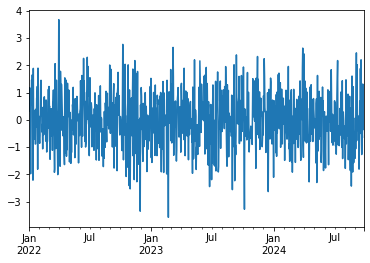

In [202]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

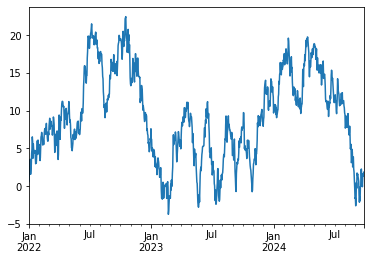

In [203]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [204]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

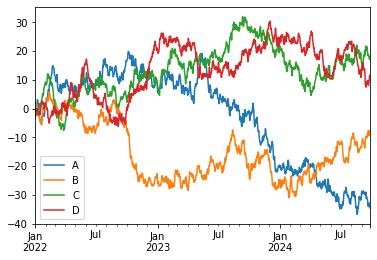

In [205]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [206]:
df.to_csv("files/foo.csv")

#### Reading from a .csv file

In [207]:
pd.read_csv("files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,-0.493801,-0.342192,-3.165596,-0.293496
1,2022-01-02,-0.185765,0.622015,-2.412853,-1.397863
2,2022-01-03,0.314739,1.496308,-2.215453,-0.370507
3,2022-01-04,-0.610617,2.373850,-2.362305,-0.738148
4,2022-01-05,-0.602492,0.723706,-0.723577,0.000092
...,...,...,...,...,...
995,2024-09-22,-34.116008,-8.079677,18.441085,8.293589
996,2024-09-23,-33.813903,-7.743680,18.001123,9.557808
997,2024-09-24,-32.844332,-8.126979,17.193800,10.357410
998,2024-09-25,-33.089291,-9.292378,17.114362,11.566640


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [208]:
# !pip install tables
df.to_hdf("files/foo.h5", "df")

#### Reading from HDF5 Store.

In [209]:
pd.read_hdf("files/foo.h5", "df")

,A,B,C,D
2022-01-01,-0.493801,-0.342192,-3.165596,-0.293496
2022-01-02,-0.185765,0.622015,-2.412853,-1.397863
2022-01-03,0.314739,1.496308,-2.215453,-0.370507
2022-01-04,-0.610617,2.373850,-2.362305,-0.738148
2022-01-05,-0.602492,0.723706,-0.723577,0.000092
...,...,...,...,...
2024-09-22,-34.116008,-8.079677,18.441085,8.293589
2024-09-23,-33.813903,-7.743680,18.001123,9.557808
2024-09-24,-32.844332,-8.126979,17.193800,10.357410
2024-09-25,-33.089291,-9.292378,17.114362,11.566640


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [210]:
df.to_excel("files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [211]:
pd.read_excel("files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,-0.493801,-0.342192,-3.165596,-0.293496
1,2022-01-02,-0.185765,0.622015,-2.412853,-1.397863
2,2022-01-03,0.314739,1.496308,-2.215453,-0.370507
3,2022-01-04,-0.610617,2.373850,-2.362305,-0.738148
4,2022-01-05,-0.602492,0.723706,-0.723577,0.000092
...,...,...,...,...,...
995,2024-09-22,-34.116008,-8.079677,18.441085,8.293589
996,2024-09-23,-33.813903,-7.743680,18.001123,9.557808
997,2024-09-24,-32.844332,-8.126979,17.193800,10.357410
998,2024-09-25,-33.089291,-9.292378,17.114362,11.566640
